In [0]:
#Created by Sreya Dhar
#Dated: 04/18/20

library(ggplot2)
library(tidyverse)

# Load the data ToothGrowth
data(ToothGrowth)
# Look at the structure of the data
dim.data.frame(ToothGrowth)
str(ToothGrowth)

[1] 60  3

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...


In [0]:
# Look at the first 3 rows of the data
head(ToothGrowth,3)

,len,supp,dose
,<dbl>,<fct>,<dbl>
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5


In [0]:
# Look at the summary of the data
summary(ToothGrowth)

      len        supp         dose      
 Min.   : 4.20   OJ:30   Min.   :0.500  
 1st Qu.:13.07   VC:30   1st Qu.:0.500  
 Median :19.25           Median :1.000  
 Mean   :18.81           Mean   :1.167  
 3rd Qu.:25.27           3rd Qu.:2.000  
 Max.   :33.90           Max.   :2.000  

In [0]:
# Compare means of the different delivery methods
tapply(ToothGrowth$len,ToothGrowth$supp, mean)


OJ       VC 
20.66333 16.96333

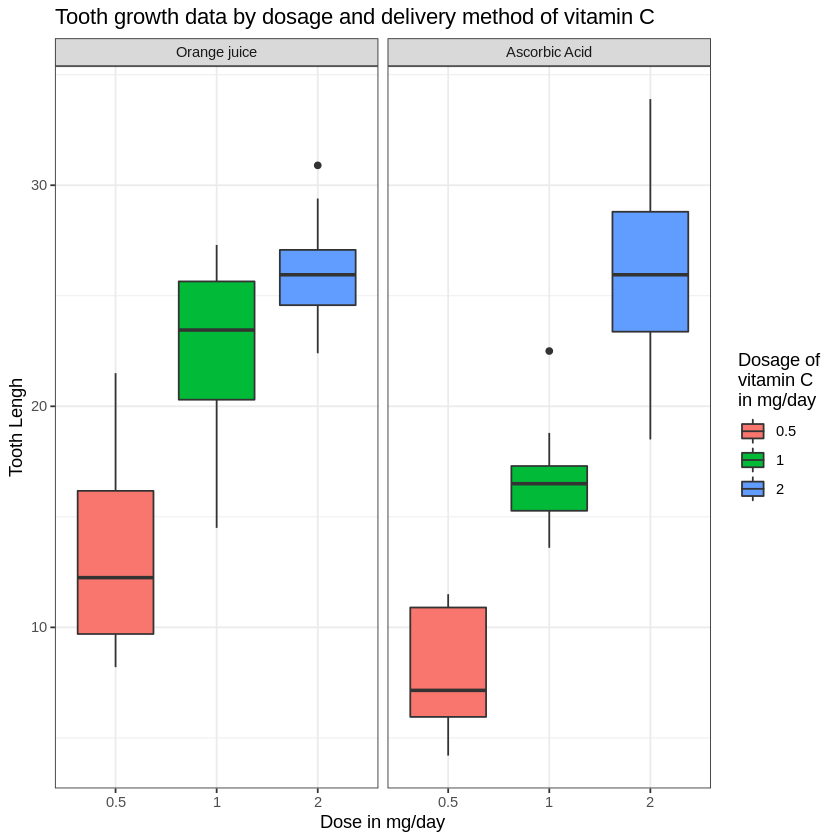

In [0]:
# Make a plot to look at data graphically
ggplot(ToothGrowth, aes(factor(dose), len, fill = factor(dose))) +
      geom_boxplot() +
      facet_grid(.~supp, labeller = as_labeller(c("OJ" = "Orange juice",  "VC" = "Ascorbic Acid"))) +
      labs(title = "Tooth growth data by dosage and delivery method of vitamin C", x = "Dose in mg/day", y = "Tooth Lengh") +
      theme_bw()+
      scale_fill_discrete(name = "Dosage of\nvitamin C\nin mg/day")

In [0]:
# Comparison by delivery method for the same dosage
t05 <- t.test(len ~ supp, data = rbind(ToothGrowth[(ToothGrowth$dose == 0.5) & (ToothGrowth$supp == "OJ"),],
                                      ToothGrowth[(ToothGrowth$dose == 0.5) & (ToothGrowth$supp == "VC"),]),                   
                                      var.equal = FALSE)
 
t1 <- t.test(len ~ supp, data = rbind(ToothGrowth[(ToothGrowth$dose == 1.0) & (ToothGrowth$supp == "OJ"),],
                                      ToothGrowth[(ToothGrowth$dose == 1.0) & (ToothGrowth$supp == "VC"),]),                   
                                      var.equal = FALSE)

t2 <- t.test(len ~ supp, data = rbind(ToothGrowth[(ToothGrowth$dose == 2.0) & (ToothGrowth$supp == "OJ"),],
                                      ToothGrowth[(ToothGrowth$dose == 2.0) & (ToothGrowth$supp == "VC"),]),                   
                                      var.equal = FALSE)

print('Summary of t05');summary(t05)
print("Summary of t1");summary(t1)
print("Summary of t2");summary(t2)

# summary of the conducted t.tests, which compare the delivery methods by dosage p-values and CI
summary_comb <- data.frame(
      "p-value" = c(t05$p.value, t1$p.value, t2$p.value),
      "Conf.Low" = c(t05$conf.int[1],t1$conf.int[1], t2$conf.int[1]),
      "Conf.High" = c(t05$conf.int[2],t1$conf.int[2], t2$conf.int[2]),
      row.names = c("Dosage .05","Dosage 1","Dosage 2"))

# Show the data table 
print("Comparison of Statistics from different methods");summary_comb

[1] "Summary of t05"


            Length Class  Mode     
statistic   1      -none- numeric  
parameter   1      -none- numeric  
p.value     1      -none- numeric  
conf.int    2      -none- numeric  
estimate    2      -none- numeric  
null.value  1      -none- numeric  
stderr      1      -none- numeric  
alternative 1      -none- character
method      1      -none- character
data.name   1      -none- character

[1] "Summary of t1"


            Length Class  Mode     
statistic   1      -none- numeric  
parameter   1      -none- numeric  
p.value     1      -none- numeric  
conf.int    2      -none- numeric  
estimate    2      -none- numeric  
null.value  1      -none- numeric  
stderr      1      -none- numeric  
alternative 1      -none- character
method      1      -none- character
data.name   1      -none- character

[1] "Summary of t2"


            Length Class  Mode     
statistic   1      -none- numeric  
parameter   1      -none- numeric  
p.value     1      -none- numeric  
conf.int    2      -none- numeric  
estimate    2      -none- numeric  
null.value  1      -none- numeric  
stderr      1      -none- numeric  
alternative 1      -none- character
method      1      -none- character
data.name   1      -none- character

[1] "Comparison of Statistics from different methods"


,p.value,Conf.Low,Conf.High
,<dbl>,<dbl>,<dbl>
Dosage .05,0.006358607,1.719057,8.780943
Dosage 1,0.001038376,2.802148,9.057852
Dosage 2,0.963851589,-3.798070,3.638070
